# Explore here

Cargamos las fotos de los animales y los visualizamos

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
data_dir = "../data/raw" 

image_size = (224, 224)
batch_size = 8  

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 16 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


/tmp/ipykernel_3957/607971504.py:28: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/gitpod/.pyenv/versions/3.12.9/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


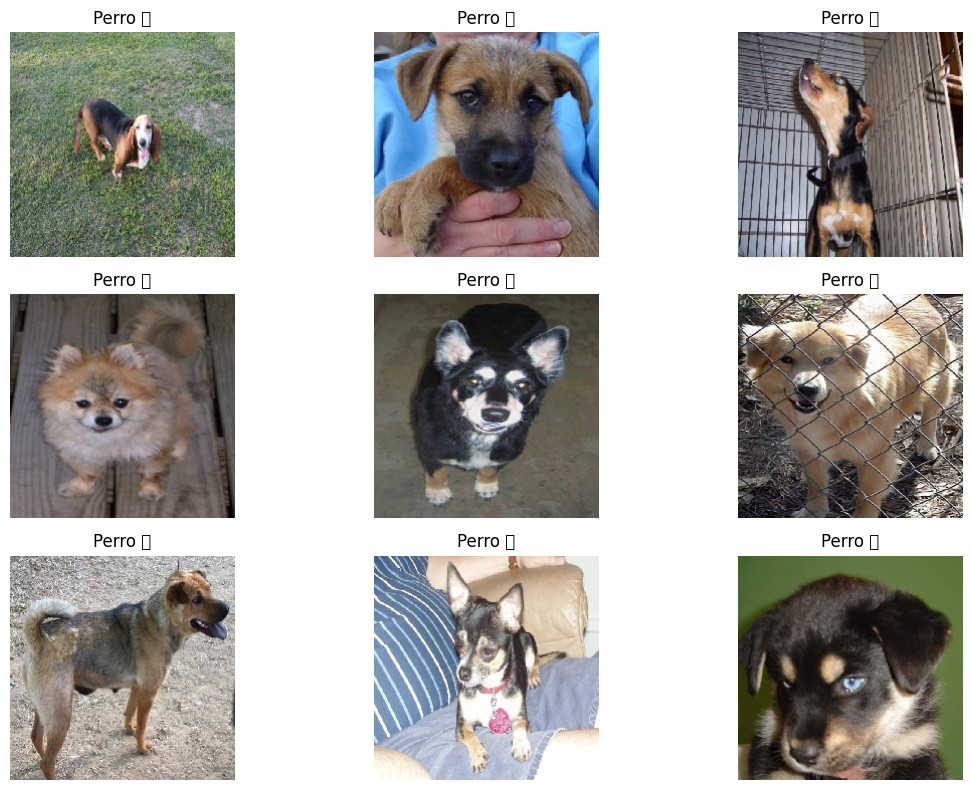

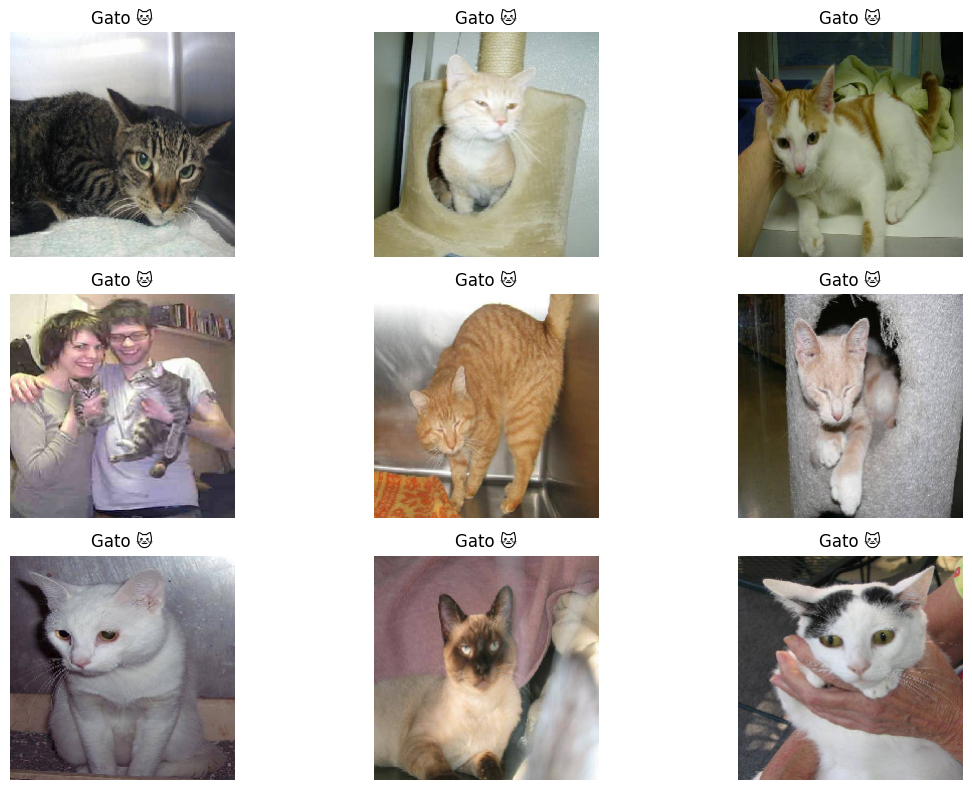

In [9]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# --- CONFIGURA LAS RUTAS ---
data_dir = "../data/raw"  # Asegúrate de que sea la ruta correcta
dog_dir = os.path.join(data_dir, "dog")
cat_dir = os.path.join(data_dir, "cat")

# --- FUNCIÓN PARA MOSTRAR 9 IMÁGENES ---
def mostrar_imagenes(ruta_carpeta, titulo, max_imagenes=9):
    archivos = os.listdir(ruta_carpeta)
    archivos = [f for f in archivos if f.endswith((".jpg", ".jpeg", ".png"))]  # solo imágenes
    archivos = archivos[:max_imagenes]

    plt.figure(figsize=(12, 8))
    for i, nombre_archivo in enumerate(archivos):
        img_path = os.path.join(ruta_carpeta, nombre_archivo)
        img = image.load_img(img_path, target_size=(224, 224))  # tamaño para MobileNet
        img_array = image.img_to_array(img) / 255.0

        plt.subplot(3, 3, i + 1)
        plt.imshow(img_array)
        plt.axis("off")
        plt.title(titulo)

    plt.tight_layout()
    plt.show()

# --- MOSTRAR IMÁGENES ---
mostrar_imagenes(dog_dir, "Perro 🐶")
mostrar_imagenes(cat_dir, "Gato 🐱")


In [10]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capa base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-04-18 04:20:47.612308: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Construimos el RNA

In [11]:
# --- ENTRENAMIENTO DEL MODELO ---
checkpoint = ModelCheckpoint("../models/mobilenetv2_best.h5", save_best_only=True, monitor="val_accuracy", verbose=1)
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint, early]
)

Epoch 1/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.3750 - loss: 1.4644
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ../models/mobilenetv2_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3750 - loss: 1.4824 - val_accuracy: 0.0000e+00 - val_loss: 1.2695
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.3125 - loss: 1.3048
Epoch 2: val_accuracy did not improve from 0.00000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3333 - loss: 1.2782 - val_accuracy: 0.0000e+00 - val_loss: 1.1878
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4375 - loss: 0.8888
Epoch 3: val_accuracy improved from 0.00000 to 0.50000, saving model to ../models/mobilenetv2_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - accuracy: 0.4167 - loss: 0.9076 - val_accuracy: 0.5000 - val_loss: 1.1203
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 0.7507
Epoch 4: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5000 - loss: 0.7470 - val_accuracy: 0.5000 - val_loss: 1.0501
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6875 - loss: 0.6129
Epoch 5: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7083 - loss: 0.6026 - val_accuracy: 0.5000 - val_loss: 0.9863
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8125 - loss: 0.5099
Epoch 6: val_accuracy did not improve from 0.50000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8333 - loss: 0.4927 - val_accuracy: 0.5000 - val_loss: 0.9273
Epoch 6: early stopping


In [12]:
# --- GUARDAR MODELO FINAL EN .H5 ---
model.save("../models/mobilenetv2_final.h5")


In [14]:
# --- CONVERTIR Y GUARDAR MODELO EN .TFLITE ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("../models/mobilenetv2_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpxprtk2p1/assets


INFO:tensorflow:Assets written to: /tmp/tmpxprtk2p1/assets


Saved artifact at '/tmp/tmpxprtk2p1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140392084695056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084695248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084694288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084696016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084697936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084693328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084695440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392098746384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392084698128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392098747344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14039208469832

W0000 00:00:1744950197.570838    3957 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744950197.570869    3957 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-18 04:23:17.571246: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpxprtk2p1
2025-04-18 04:23:17.583420: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-18 04:23:17.583433: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpxprtk2p1
I0000 00:00:1744950197.713241    3957 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-18 04:23:17.742968: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-18 04:23:18.396838: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpxprtk2p1
2025-04-18 04:23:18.566187: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

In [15]:
# --- VERIFICAR TAMAÑO DE LOS ARCHIVOS GUARDADOS ---
!ls -lh ../models/


total 32M
-rw-r--r-- 1 gitpod gitpod  12M Apr 18 04:21 mobilenetv2_best.h5
-rw-r--r-- 1 gitpod gitpod  12M Apr 18 04:21 mobilenetv2_final.h5
-rw-r--r-- 1 gitpod gitpod 9.1M Apr 18 04:23 mobilenetv2_model.tflite


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step


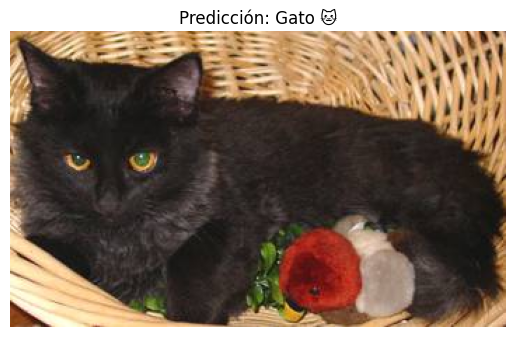

In [16]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y preprocesar
img_path = "/workspace/ML-Clasificar-Imagenes/data/test/999.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # <-- Ojo, MobileNet usa 224x224
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)

# Cargar modelo entrenado
model = load_model("../models/mobilenetv2_final.h5")

# Predecir
prediction = model.predict(img_array)

# Mostrar imagen y resultado
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title("Predicción: " + ("Perro 🐶" if prediction[0][1] > prediction[0][0] else "Gato 🐱"))
plt.show()
